In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2


In [2]:
df=pd.read_csv("news_dataset.csv")
df

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
...,...,...
3724,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3725,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3726,FAKE,The Bengaluru City Police’s official Twitter h...
3727,REAL,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\..."


In [3]:
df.groupby('label').text.count()


label
FAKE    1871
REAL    1850
Name: text, dtype: int64

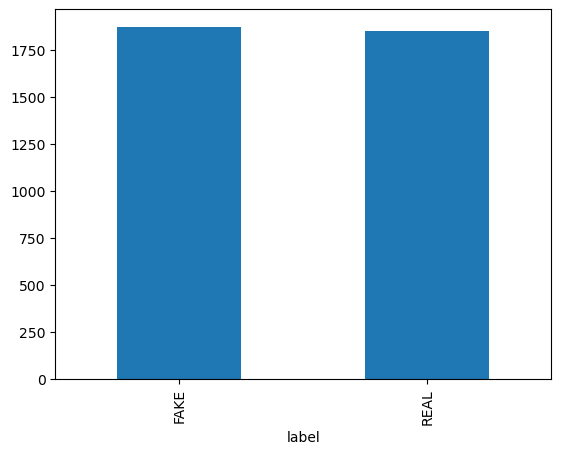

In [4]:
df.groupby('label').text.count().plot.bar()
plt.show()

In [5]:
#data cleaning
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
word=stopwords.words('english')

word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
df.duplicated(subset="text").sum()
df.drop_duplicates(subset="text",keep="first",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2230 non-null   object
 1   text    2229 non-null   object
dtypes: object(2)
memory usage: 52.3+ KB


In [8]:
df.isnull().sum()



label    0
text     1
dtype: int64

In [9]:
df.dropna(axis=0,how='any',inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2229 non-null   object
 1   text    2229 non-null   object
dtypes: object(2)
memory usage: 52.2+ KB


In [11]:
import re,string
stemmer=PorterStemmer()
# a=list(df["text"].iloc[0:1])[0]
# reg=re.sub("[^a-zA-Z]"," ",a)
# all_token=reg.split()
# print(a)
# print([i for i in all_token if i not in word])

df['clean']=df['text'].apply(lambda x:" ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in word]).lower())
df['clean']



0       payal accus filmmak anurag kashyap behav inapp...
1       a four minut long video woman criticis govern ...
2       republ poll fake twitter account imit arnab go...
3       delhi teen find place un green list turn glass...
4       delhi a high level meet underway resid rajya s...
                              ...                        
3719    a set imag share facebook claim show instanc r...
3720    bare hour ahead vote assembl elect karnataka f...
3722    a quot impostor facebook page financ minist fm...
3726    the bengaluru citi polic offici twitter handl ...
3727    sep am ist sourc toi meet neelkantha bhanu pra...
Name: clean, Length: 2229, dtype: object

In [12]:
df

,label,text,clean
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...,payal accus filmmak anurag kashyap behav inapp...
1,FAKE,A four-minute-long video of a woman criticisin...,a four minut long video woman criticis govern ...
2,FAKE,"Republic Poll, a fake Twitter account imitatin...",republ poll fake twitter account imit arnab go...
3,REAL,"Delhi teen finds place on UN green list, turns...",delhi teen find place un green list turn glass...
4,REAL,Delhi: A high-level meeting underway at reside...,delhi a high level meet underway resid rajya s...
...,...,...,...
3719,FAKE,A set of images is being shared on Facebook wi...,a set imag share facebook claim show instanc r...
3720,FAKE,Barely 48 hours ahead of voting in the assembl...,bare hour ahead vote assembl elect karnataka f...
3722,FAKE,A quote by an impostor Facebook page of Financ...,a quot impostor facebook page financ minist fm...
3726,FAKE,The Bengaluru City Police’s official Twitter h...,the bengaluru citi polic offici twitter handl ...


In [13]:
fake=df[df['label']=='FAKE'][0:377]
real=df[df['label']=='REAL'][0:377]
new_df=pd.concat([fake,real])
new_df

,label,text,clean
1,FAKE,A four-minute-long video of a woman criticisin...,a four minut long video woman criticis govern ...
2,FAKE,"Republic Poll, a fake Twitter account imitatin...",republ poll fake twitter account imit arnab go...
6,FAKE,A viral image showing controversial Islamic pr...,a viral imag show controversi islam preacher z...
7,FAKE,Several photos are being shared with the misle...,sever photo share mislead claim bungalow forme...
8,FAKE,The driver of the DMU train Arvind Kumar has N...,the driver dmu train arvind kumar not commit s...
...,...,...,...
3671,REAL,Superstar Priyanka Chopra Jonas has now been l...,superstar priyanka chopra jona list public amo...
3676,REAL,PANAJI: The second phase of reviving the cocon...,panaji the second phase reviv coconut tree lin...
3678,REAL,Pune: The state irrigation department has stop...,pune the state irrig depart stop water dischar...
3707,REAL,DUBAI: Sunrisers Hyderabad captain David Warne...,dubai sunris hyderabad captain david warner ho...


In [14]:
new_df=new_df.sample(frac=1)
new_df

,label,text,clean
55,FAKE,"A photo more than a decade old, showing a Nepa...",a photo decad old show nepales policeman pull ...
2986,REAL,CHANDIGARH: Punjab chief minister Amarinder Si...,chandigarh punjab chief minist amarind singh s...
620,FAKE,A Bengali blog impersonating India Today has f...,a bengali blog imperson india today fals attri...
2714,REAL,NEW DELHI: The forest department has indefinit...,new delhi the forest depart indefinit postpon ...
334,FAKE,A nearly nine-year-old video showing Supreme C...,a nearli nine year old video show suprem court...
...,...,...,...
1317,REAL,MUZAFFARNAGAR: Body of a 65-year-old farmer wa...,muzaffarnagar bodi year old farmer found hang ...
22,REAL,TimesView Patients not needing hospital care f...,timesview patient need hospit care form overwh...
195,FAKE,A video of a man gasping for breath while lyin...,a video man gasp breath lie stretcher gone vir...
2720,REAL,GREATER NOIDA: Teams from the district’s healt...,greater noida team district health depart depu...


In [15]:
from sklearn.linear_model import LogisticRegression
log_regression=LogisticRegression()
vectorizer=TfidfVectorizer(min_df=3,stop_words="english",norm='l2')
x=new_df['clean']
y=new_df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
pipeline=Pipeline([('vect',vectorizer),('chi',SelectKBest(chi2,k=500)),('clf',LogisticRegression(random_state=0))])
model=pipeline.fit(x_train,y_train)

In [16]:
from sklearn.metrics import accuracy_score
predict=model.predict(x_test)
print(predict)
print(accuracy_score(y_test,predict))


['REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL'
 'REAL' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'REAL' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE'
 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL' 'FAKE'
 'REAL' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL' 'FAKE' 'FAKE' 'REAL'
 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE'
 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE'
 'REAL' 'REAL' 'REAL' 'REAL' 'REAL' 'REAL' 'REAL' 'REAL' 'FAKE' 'REAL'
 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE'
 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE'
 'FAKE' 'FAKE' 'REAL' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL'
 'FAKE' 'REAL' 'REAL' 'REAL' 'FAKE' 'FAKE' 'REAL' 'REAL' 'FAKE' 'FAKE'
 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL'
 'REAL' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL'
 'REAL

In [17]:
new_df


,label,text,clean
55,FAKE,"A photo more than a decade old, showing a Nepa...",a photo decad old show nepales policeman pull ...
2986,REAL,CHANDIGARH: Punjab chief minister Amarinder Si...,chandigarh punjab chief minist amarind singh s...
620,FAKE,A Bengali blog impersonating India Today has f...,a bengali blog imperson india today fals attri...
2714,REAL,NEW DELHI: The forest department has indefinit...,new delhi the forest depart indefinit postpon ...
334,FAKE,A nearly nine-year-old video showing Supreme C...,a nearli nine year old video show suprem court...
...,...,...,...
1317,REAL,MUZAFFARNAGAR: Body of a 65-year-old farmer wa...,muzaffarnagar bodi year old farmer found hang ...
22,REAL,TimesView Patients not needing hospital care f...,timesview patient need hospit care form overwh...
195,FAKE,A video of a man gasping for breath while lyin...,a video man gasp breath lie stretcher gone vir...
2720,REAL,GREATER NOIDA: Teams from the district’s healt...,greater noida team district health depart depu...


In [20]:
news=input("Enter news=")
news_df=pd.DataFrame({"original_news":[news]})
predict=model.predict(news_df['original_news'])
predict

Enter news=sagarmatha is in india


array(['REAL'], dtype=object)